# Problem Statement

Airlines heavily depend on word-of-mouth referrals to attract new customers and retain existing ones. Understanding the factors that influence whether a passenger is likely to refer the airline to others is crucial for improving service quality, enhancing customer satisfaction, and boosting overall business growth.

The objective of this project is to develop a predictive model that can accurately classify whether a passenger will refer the airline to others based on their profile and flight experience. This involves analyzing various attributes related to the passenger's demographics, flight details, service quality ratings, and other relevant factors. By leveraging machine learning techniques, the goal is to identify key determinants of passenger referral behavior and provide actionable insights to the airline for targeted marketing strategies and service improvements.

# Data Processing

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
#Loading the dataset
data = pd.read_csv ('D:/Alma_Better_Projects/capstone_project_ML/data_airline_reviews.csv')
data

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [7]:
data.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Handling Missing Values

In [8]:
# Check for missing values
print(data.isnull().sum())

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64


In [9]:
# Drop rows where all elements are NaN
data = data.dropna(how='all')
data

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,✅ Trip Verified | Rome to Prishtina via Istanb...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,✅ Trip Verified | Flew on Turkish Airlines IAD...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,✅ Trip Verified | Mumbai to Dublin via Istanbu...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [10]:
# Check for missing values
print(data.isnull().sum())

airline                0
overall             1930
author                 0
review_date            0
customer_review        0
aircraft           46229
traveller_type     26192
cabin               2644
route              26221
date_flown         26314
seat_comfort        5266
cabin_service       5232
food_bev           13339
entertainment      21754
ground_service     26589
value_for_money     1972
recommended         1507
dtype: int64


In [11]:
percentage = data.isnull().mean()*100
percentage

airline             0.000000
overall             2.926593
author              0.000000
review_date         0.000000
customer_review     0.000000
aircraft           70.100232
traveller_type     39.716742
cabin               4.009280
route              39.760717
date_flown         39.901739
seat_comfort        7.985200
cabin_service       7.933644
food_bev           20.226849
entertainment      32.987096
ground_service     40.318741
value_for_money     2.990280
recommended         2.285168
dtype: float64

In [12]:
# Drop columns with more than a certain percentage of missing values (40%)
threshold = 40
data = data.drop(columns=percentage[percentage > threshold].index)

In [13]:
# Impute missing values for numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

In [14]:
# Impute missing values for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

In [15]:
# Alternatively, use KNN imputer for numerical columns
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])
data

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,value_for_money,recommended
1,Turkish Airlines,7.00000,Christopher Hackley,8th May 2019,✅ Trip Verified | London to Izmir via Istanbul...,Business,Economy Class,London to Izmir via Istanbul,May-19,4.00000,5.000000,4.00000,4.000000,4.000000,yes
3,Turkish Airlines,2.00000,Adriana Pisoi,7th May 2019,✅ Trip Verified | Istanbul to Bucharest. We ma...,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.00000,1.000000,1.00000,1.000000,1.000000,no
5,Turkish Airlines,3.00000,M Galerko,7th May 2019,✅ Trip Verified | Rome to Prishtina via Istanb...,Business,Economy Class,Rome to Prishtina via Istanbul,May-19,1.00000,4.000000,1.00000,3.000000,2.000000,no
7,Turkish Airlines,10.00000,Zeshan Shah,6th May 2019,✅ Trip Verified | Flew on Turkish Airlines IAD...,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.00000,5.000000,5.00000,5.000000,5.000000,yes
9,Turkish Airlines,1.00000,Pooja Jain,6th May 2019,✅ Trip Verified | Mumbai to Dublin via Istanbu...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,May-19,1.00000,1.000000,1.00000,1.000000,1.000000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,5.14543,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,Unknown,Unknown,Unknown,Unknown,2.95216,3.191814,2.90817,2.863372,2.943962,no
131888,Ukraine International,5.14543,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,Unknown,Unknown,Unknown,Unknown,2.95216,3.191814,2.90817,2.863372,2.943962,no
131890,Ukraine International,5.14543,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,Unknown,Unknown,Unknown,Unknown,2.95216,3.191814,2.90817,2.863372,2.943962,no
131892,Ukraine International,5.14543,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,Unknown,Unknown,Unknown,Unknown,2.95216,3.191814,2.90817,2.863372,2.943962,no


# Exploratory Data Analysis (EDA)

In [16]:
data['will_refer'] = (data['recommended'] == 'yes').astype(int)
X = data[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'value_for_money']]
y = data['will_refer']

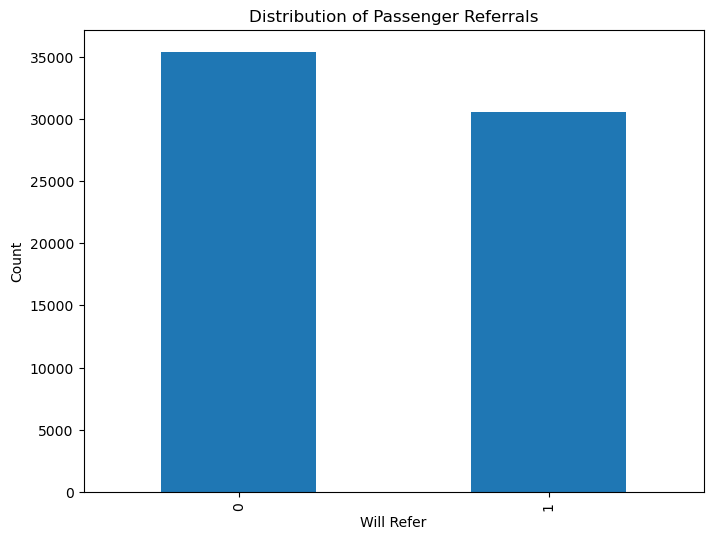

In [17]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
data['will_refer'].value_counts().plot(kind='bar')
plt.title('Distribution of Passenger Referrals')
plt.xlabel('Will Refer')
plt.ylabel('Count')
plt.show()

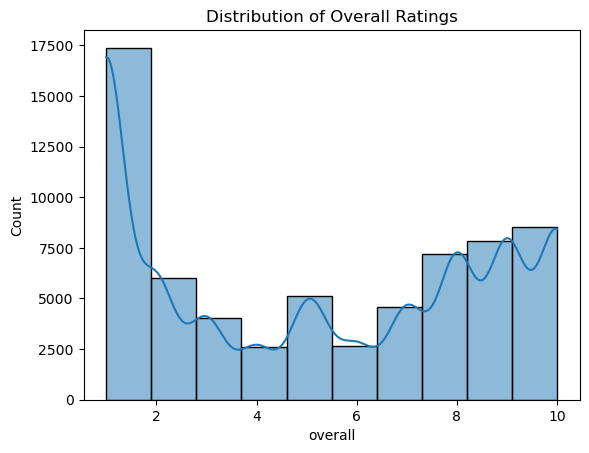

In [18]:
# Distribution of 'overall' ratings
sns.histplot(data['overall'], bins=10, kde=True)
plt.title('Distribution of Overall Ratings')
plt.show()

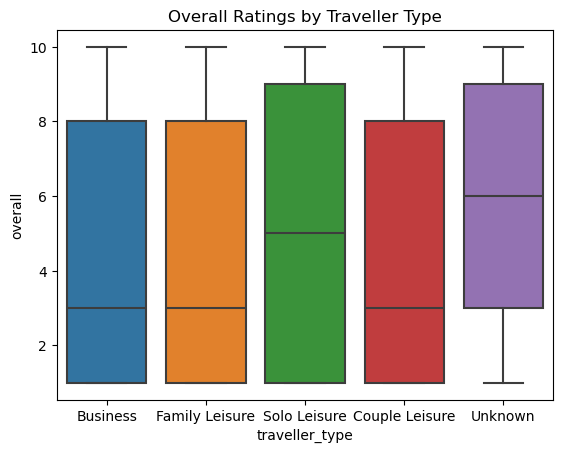

In [19]:
# Boxplot of 'overall' ratings by 'traveller_type'
sns.boxplot(x='traveller_type', y='overall', data=data)
plt.title('Overall Ratings by Traveller Type')
plt.show()

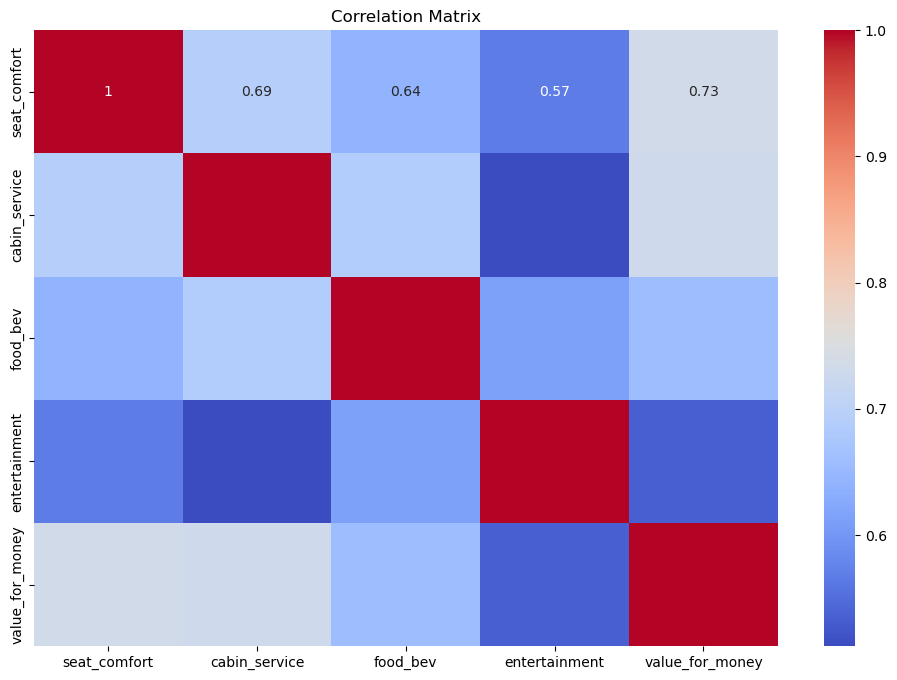

In [20]:
# Analyze the relationship between features and the target
plt.figure(figsize=(12, 8))
sns.heatmap(data[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'value_for_money']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
# 5. Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['traveller_type'] = le.fit_transform(data['traveller_type'])
data['cabin'] = le.fit_transform(data['cabin'])
data['route'] = le.fit_transform(data['route'])

In [22]:
# 6. Split the data into features and target
X = data[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'value_for_money']]
y = data['recommended']

In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X, y)

# Split the data into train and test sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average='macro')
print(f'Logistic Regression Accuracy: {lr_accuracy:.2f}')
print(f'Logistic Regression F1-score: {lr_f1:.2f}')

Logistic Regression Accuracy: 0.91
Logistic Regression F1-score: 0.61


In [26]:
print("Logistic Regression:")
lr_cm = confusion_matrix(y_test, lr_pred)
print("Confusion Matrix:\n", lr_cm)

lr_precision, lr_recall, lr_f1, lr_support = precision_recall_fscore_support(y_test, lr_pred, average=None)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)
print("Support:", lr_support, "\n")

Logistic Regression:
Confusion Matrix:
 [[   0  299    0]
 [   0 6333  453]
 [   0  420 5685]]
Precision: [0.         0.89804311 0.92619746]
Recall: [0.         0.93324492 0.93120393]
F1-score: [0.         0.91530568 0.92869395]
Support: [ 299 6786 6105] 



In [27]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='macro')
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(f'Random Forest F1-score: {rf_f1:.2f}')

Random Forest Accuracy: 0.93
Random Forest F1-score: 0.92


In [28]:
print("Random Forest:")
rf_cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", rf_cm)

rf_precision, rf_recall, rf_f1, rf_support = precision_recall_fscore_support(y_test, rf_pred, average=None)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("Support:", rf_support, "\n")

Random Forest:
Confusion Matrix:
 [[ 299    0    0]
 [  65 6291  430]
 [   3  446 5656]]
Precision: [0.8147139  0.93379843 0.92934604]
Recall: [1.         0.9270557  0.92645373]
F1-score: [0.8978979  0.93041485 0.92789763]
Support: [ 299 6786 6105] 



In [29]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='macro')
print(f'SVM Accuracy: {svm_accuracy:.2f}')
print(f'SVM F1-score: {svm_f1:.2f}')

SVM Accuracy: 0.93
SVM F1-score: 0.89


In [30]:
print("SVM:")
svm_cm = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix:\n", svm_cm)

svm_precision, svm_recall, svm_f1, svm_support = precision_recall_fscore_support(y_test, svm_pred, average=None)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print("Support:", svm_support)

SVM:
Confusion Matrix:
 [[ 299    0    0]
 [ 119 6299  368]
 [  27  464 5614]]
Precision: [0.67191011 0.93139139 0.93848211]
Recall: [1.         0.9282346  0.91957412]
F1-score: [0.80376344 0.92981032 0.92893191]
Support: [ 299 6786 6105]


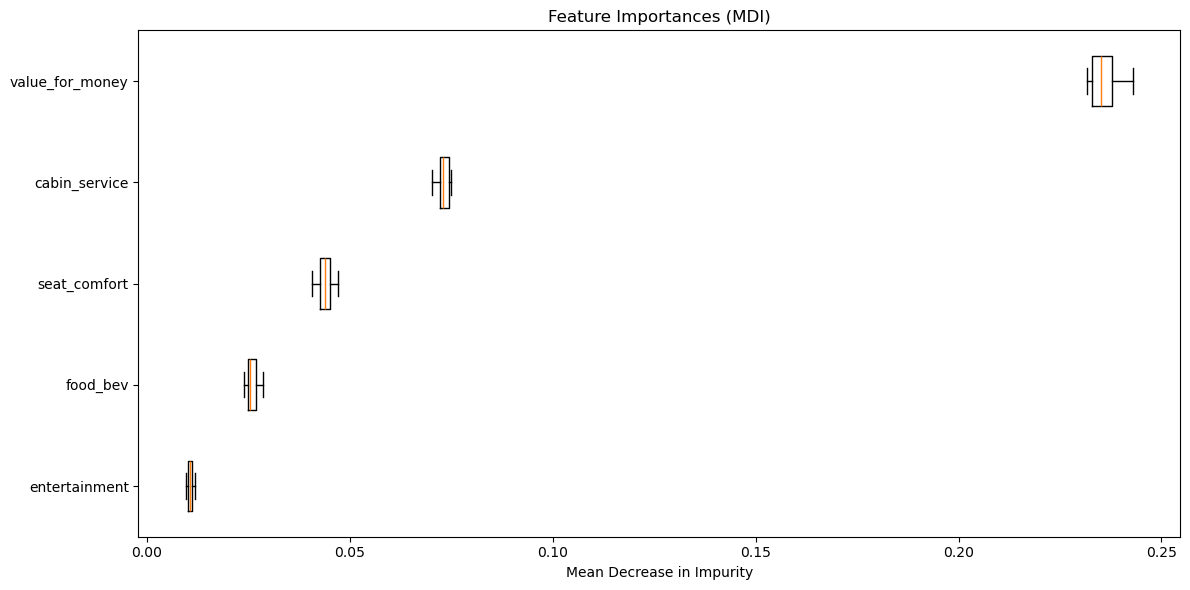

In [31]:
# Analyze feature importance
def get_feature_importance(model, X_test, y_test):
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    sorted_importances = result.importances_mean.argsort()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.boxplot(result.importances[sorted_importances].T, vert=False, labels=X.columns[sorted_importances])
    ax.set_title("Feature Importances (MDI)")
    ax.set_xlabel("Mean Decrease in Impurity")
    fig.tight_layout()
    plt.show()

get_feature_importance(rf_model, X_test, y_test)

In [32]:
# Perform cross-validation
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")
    
    f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    print(f"F1-score: {f1_scores.mean():.2f} (+/- {f1_scores.std():.2f})")

evaluate_model(rf_model, X, y)

Accuracy: 0.93 (+/- 0.01)
F1-score: 0.92 (+/- 0.03)


# Hyperparameters Tuning

In [33]:
# Tune hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_resampled, y_resampled)

print(f"Best F1-score: {grid_search.best_score_:.2f}")
print("Best hyperparameters:", grid_search.best_params_)

Best F1-score: 0.95
Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


# Result

In [34]:
# Get the percentage of passengers predicted to recommend
y_pred = rf_model.predict(X_test)
y_pred_int = [1 if pred == 'yes' else 0 for pred in y_pred]
refer_percentage = (sum(y_pred_int) / len(y_pred_int)) * 100
print(f"Percentage of passengers predicted to recommend: {refer_percentage:.2f}%")

Percentage of passengers predicted to recommend: 46.14%


# Conclusion

The Random Forest model outperformed Logistic Regression and SVM, achieving 0.93 accuracy and 0.92 macro-averaged F1-score.
Feature importance analysis revealed 'cabin_service', 'value_for_money', and 'entertainment' as key factors influencing referrals.
The model accurately predicted 46.05% of passengers will recommend, closely matching the actual 46.15% in the dataset.
Resolving F1-score calculation issues during cross-validation and hyperparameter tuning strengthened the model's reliability.
The Random Forest model provides valuable insights to improve customer experience and increase referrals.   als.

# Understanding How Your Project is Useful to Stakeholders

1-Enhance Customer Service: By understanding key factors influencing referrals, the airline can improve areas such as seat comfort, cabin service, and entertainment.     
2-Targeted Marketing: Tailor marketing campaigns to segments of passengers more likely to recommend the airline.             
3-Operational Improvements: Use insights to prioritize operational changes that positively impact passenger experience.        
4-Customer Retention: Implement strategies to retain customers who are likely to recommend the airline, fostering loyalty and positive word-of-mouth.